In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arboviroses = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\vector_borne_br\data\all_arb_cid.csv', encoding ='latin1')

In [3]:

coronel_pacheco = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\vector_borne_br\data\Coronel_Pacheco.csv', encoding ='latin1', skiprows=10, sep=';')
juiz_de_fora = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\vector_borne_br\data\Juiz_de_fora.csv',encoding ='latin1', skiprows=10, sep=';')
manhuacu = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\vector_borne_br\data\Manhuacu.csv', encoding ='latin1', skiprows=10, sep=';')
muriae = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\vector_borne_br\data\Muriae.csv', encoding ='latin1', skiprows=10, sep=';')
vicosa = pd.read_csv(r'C:\Users\johnn\Documents\workspace\Projetos\vector_borne_br\data\Vicosa.csv', encoding ='latin1', skiprows=10, sep=';')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

# Exploração inicial e transformação de dados

In [5]:
coronel_pacheco.head(1)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 11
0,2012-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
arboviroses.tail(1)

,Unnamed: 0,CLASSI_FIN,codigo_municipio_completo,COMUNINF,COPAISINF,COUFINF,CRITERIO,CS_ESCOL_N,CS_FLXRET,CS_GESTANT,CS_RACA,CS_SEXO,DOENCA_TRA,DT_ENCERRA,DT_INVEST,DT_NOTIFIC,DT_OBITO,DT_SIN_PRI,EVOLUCAO,FLXRECEBI,ID_AGRAVO,ID_MN_RESI,ID_MUNICIP,ID_PAIS,ID_REGIONA,ID_RG_RESI,mesorregiao_geografica,microrregiao_geografica,municipio,NDUPLIC_N,nome_mesorregiao,nome_microrregiao,nome_municipio,nome_uf,NU_ANO,NU_IDADE_N,SEM_NOT,SEM_PRI,SG_UF,SG_UF_NOT,TP_NOT,TPAUTOCTO,uf,X,X.1,tipo
67001,67002,13.0,3136702,313670.0,1.0,31.0,1.0,9.0,NaN,6.0,9.0,M,NaN,2019-12-27,2019-12-27,2019-12-27,NaN,2019-09-05,1.0,NaN,A92.,313670,313670,1,1452,1452,12,65,36702,NaN,Zona da Mata,Juiz de Fora,Juiz de Fora,Minas Gerais,2019,4048,201952,201936,31,31,2,1.0,31,564,37477,chik


In [7]:
tipos_cidades_arbo = arboviroses['nome_municipio'].value_counts()
print(tipos_cidades_arbo)

nome_municipio
Juiz de Fora       48251
Muriaé              7965
Manhuaçu            5900
Viçosa              4806
Coronel Pacheco       80
Name: count, dtype: int64


In [8]:
tipos = arboviroses['tipo'].value_counts()
print(tipos)

tipo
deng    65907
chik      652
zika      443
Name: count, dtype: int64


In [9]:
colunas_arbo = arboviroses.columns
print(colunas_arbo)

Index(['Unnamed: 0', 'CLASSI_FIN', 'codigo_municipio_completo', 'COMUNINF',
       'COPAISINF', 'COUFINF', 'CRITERIO', 'CS_ESCOL_N', 'CS_FLXRET',
       'CS_GESTANT', 'CS_RACA', 'CS_SEXO', 'DOENCA_TRA', 'DT_ENCERRA',
       'DT_INVEST', 'DT_NOTIFIC', 'DT_OBITO', 'DT_SIN_PRI', 'EVOLUCAO',
       'FLXRECEBI', 'ID_AGRAVO', 'ID_MN_RESI', 'ID_MUNICIP', 'ID_PAIS',
       'ID_REGIONA', 'ID_RG_RESI', 'mesorregiao_geografica',
       'microrregiao_geografica', 'municipio', 'NDUPLIC_N', 'nome_mesorregiao',
       'nome_microrregiao', 'nome_municipio', 'nome_uf', 'NU_ANO',
       'NU_IDADE_N', 'SEM_NOT', 'SEM_PRI', 'SG_UF', 'SG_UF_NOT', 'TP_NOT',
       'TPAUTOCTO', 'uf', 'X', 'X.1', 'tipo'],
      dtype='object')


In [10]:
colunas_clima = muriae.columns
print(colunas_clima)

Index(['Data Medicao', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
       'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
       'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
       'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
       'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', 'Unnamed: 11'],
      dtype='object')


In [11]:
#Vamos combinar as tabelas dos climas das cidades em uma única tabela
#cria uma coluna'cidade' para identificar a qual pertence o dado

coronel_pacheco['cidade'] = 'Coronel Pacheco'
juiz_de_fora['cidade'] = 'Juiz de Fora'
manhuacu['cidade'] = 'Manhuaçu'
muriae['cidade'] = 'Muriaé'
vicosa['cidade'] = 'Viçosa'

#concatenar em uma única tabela
df_clima = pd.concat([coronel_pacheco, juiz_de_fora, manhuacu, muriae, vicosa], ignore_index=True)
df_clima.head(1)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 11,cidade
0,2012-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coronel Pacheco


In [12]:
arboviroses_c = arboviroses.copy()
clima_c = df_clima.copy()

In [13]:
colunas_clima = ['Data Medicao', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
       'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
       'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
       'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
       'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', 'cidade']

clima_c = clima_c[colunas_clima]
clima_c.head(1)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",cidade
0,2012-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coronel Pacheco


A coluna NU_IDADE_N na tabela arboviroses_c é referente a idade dos pacientes. Porém, ela segue uma regra:


A composição da variável 
obedece o seguinte critério: 1o dígito: 

1. Hora 

2. Dia 

3. Mês 

4. Ano 

 
Ex: 

3009 – nove meses, 

4018 – dezoito anos, 

2072 - setenta e dois dias, 

1010 - dez horas


Para conseguirmos trabalhar melhor com os dados de idade, podemos criar um código, associado a uma classificação cronológica e a regra para ter tal classificação


1 - Recém-nascido: Primeiras 4 semanas de vida (desde a 0h).

2 - Lactante: Do 1º ao 24º mês.

3 -Primeira Infância: Dos 2 aos 5 anos.

4 -Segunda Infância: Dos 6 aos 11 anos.

5 -Adolescência: Dos 12 aos 18 anos.

6 -Jovem Adulto: Dos 19 aos 40 anos.

7 -Adulto: Dos 41 aos 60 anos.

8 -Idoso: Acima de 60 anos

In [14]:
#definir uma função para converter o código de idade em classificação cronológica

def classificar_idade(codigo_idade):
    if pd.isna(codigo_idade):
        return None, None
    
    codigo_idade = str(int(codigo_idade))
    primeiro_digito = int(codigo_idade[0])
    valor = int(codigo_idade[1:])
    
    if primeiro_digito == 1:  # horas
        return 'Recém-nascido', 1
    elif primeiro_digito == 2:  # dias
        if valor <= 28:
            return 'Recém-nascido', 1
        elif valor <= 365:
            return 'Lactante', 2
        elif valor <= 1825:
            return 'Primeira Infância', 3
        elif valor <= 4015:  # aproximadamente 11 anos
            return 'Segunda Infância', 4
        else:
            return 'Adolescência', 5
    elif primeiro_digito == 3:  # meses
        if valor <= 24:
            return 'Lactante', 2
        elif valor <= 60:
            return 'Primeira Infância', 3
        elif valor <= 132:
            return 'Segunda Infância', 4
        elif valor <= 216:
            return 'Adolescência', 5
        elif valor <= 480:  # proximadamente 40 anos
            return 'Jovem Adulto', 6
        else:
            return 'Adulto', 7
    elif primeiro_digito == 4:  # nos
        if valor <= 1:
            return 'Lactante', 2
        elif valor <= 5:
            return 'Primeira Infância', 3
        elif valor <= 11:
            return 'Segunda Infância', 4
        elif valor <= 18:
            return 'Adolescência', 5
        elif valor <= 40:
            return 'Jovem Adulto', 6
        elif valor <= 60:
            return 'Adulto', 7
        else:
            return 'Idoso', 8
    return None, None

# verificando se deu certo
print(classificar_idade(3009))  # ('Lactante', 2)



('Lactante', 2)


In [15]:
# adicionar a função e novas colunas no dataframe
arboviroses_c['CRONO'], arboviroses_c['ID_CRONO'] = zip(*arboviroses_c['NU_IDADE_N'].apply(classificar_idade))

# Verificar o resultado
print(arboviroses_c[['NU_IDADE_N', 'CRONO', 'ID_CRONO']].head())


   NU_IDADE_N         CRONO  ID_CRONO
0        4016  Adolescência       5.0
1        4016  Adolescência       5.0
2        4070         Idoso       8.0
3        4027  Jovem Adulto       6.0
4        4012  Adolescência       5.0


In [16]:
print((arboviroses_c.isnull().sum() / len(arboviroses_c)) * 100)

Unnamed: 0                    0.000000
CLASSI_FIN                    0.088057
codigo_municipio_completo     0.000000
COMUNINF                     66.929345
COPAISINF                    66.668159
COUFINF                      66.903973
CRITERIO                     51.296976
CS_ESCOL_N                   19.633742
CS_FLXRET                     0.910421
CS_GESTANT                    0.028357
CS_RACA                       7.734097
CS_SEXO                       0.000000
DOENCA_TRA                   76.879795
DT_ENCERRA                    0.141787
DT_INVEST                    51.073102
DT_NOTIFIC                    0.000000
DT_OBITO                     99.811946
DT_SIN_PRI                    0.000000
EVOLUCAO                     51.876063
FLXRECEBI                    99.298528
ID_AGRAVO                     0.000000
ID_MN_RESI                    0.000000
ID_MUNICIP                    0.000000
ID_PAIS                       0.000000
ID_REGIONA                    0.000000
ID_RG_RESI               

In [17]:
#retirando as colunas com quase 100% de valores nulos
arboviroses_c.drop(columns=['DT_OBITO', 'NDUPLIC_N'], inplace =True)

In [18]:
print((clima_c.isnull().sum() / len(clima_c)) * 100)

Data Medicao                                               0.000000
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                       7.016359
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                 4.531197
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)    4.092072
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                      2.403127
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                       5.361193
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                      2.417604
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)              3.175216
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)             2.427255
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                     2.427255
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                  3.484052
cidade                                                     0.000000
dtype: float64


In [19]:
arboviroses_cc = arboviroses_c.copy()
clima_cc = clima_c.copy()

In [20]:
print(arboviroses_c['nome_municipio'].dtype)
print(clima_c['cidade'].dtype)

object
object


In [21]:
#juntar tudo em um unico dataframe
clima_c.rename(columns={'cidade':'nome_municipio'}, inplace=True)
arboclima = pd.merge(arboviroses_c, clima_c, 
                     left_on=['DT_NOTIFIC', 'nome_municipio'], 
                     right_on=['Data Medicao', 'nome_municipio'],
                     how='inner')  #  usando inner join para manter apenas as correspondências exatas
arboclima.head(1)

,Unnamed: 0,CLASSI_FIN,codigo_municipio_completo,COMUNINF,COPAISINF,COUFINF,CRITERIO,CS_ESCOL_N,CS_FLXRET,CS_GESTANT,CS_RACA,CS_SEXO,DOENCA_TRA,DT_ENCERRA,DT_INVEST,DT_NOTIFIC,DT_SIN_PRI,EVOLUCAO,FLXRECEBI,ID_AGRAVO,ID_MN_RESI,ID_MUNICIP,ID_PAIS,ID_REGIONA,ID_RG_RESI,mesorregiao_geografica,microrregiao_geografica,municipio,nome_mesorregiao,nome_microrregiao,nome_municipio,nome_uf,NU_ANO,NU_IDADE_N,SEM_NOT,SEM_PRI,SG_UF,SG_UF_NOT,TP_NOT,TPAUTOCTO,uf,X,X.1,tipo,CRONO,ID_CRONO,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,1,1.0,3139409,NaN,NaN,NaN,1.0,9.0,0.0,5.0,3.0,F,2.0,2013-01-25,2013-01-03,2013-01-03,2012-12-30,1.0,NaN,A90,313940,313940,1,1454,1454,12,61,39409,Zona da Mata,Manhuaçu,Manhuaçu,Minas Gerais,2013,4016,201301,201301,31,31,2,NaN,31,2967,2967,deng,Adolescência,5.0,2013-01-03,0.0,923.183333,17.379167,30.3,23.195833,18.2,71.875,43.0,11.0,1.8375


In [22]:
drop_col = ['Unnamed: 0','CRITERIO', 'CLASSI_FIN','CS_FLXRET','FLXRECEBI', 'X', 'X.1']
arboclima2 = arboclima.drop(columns=drop_col)
arboclima2.head(1)

,codigo_municipio_completo,COMUNINF,COPAISINF,COUFINF,CS_ESCOL_N,CS_GESTANT,CS_RACA,CS_SEXO,DOENCA_TRA,DT_ENCERRA,DT_INVEST,DT_NOTIFIC,DT_SIN_PRI,EVOLUCAO,ID_AGRAVO,ID_MN_RESI,ID_MUNICIP,ID_PAIS,ID_REGIONA,ID_RG_RESI,mesorregiao_geografica,microrregiao_geografica,municipio,nome_mesorregiao,nome_microrregiao,nome_municipio,nome_uf,NU_ANO,NU_IDADE_N,SEM_NOT,SEM_PRI,SG_UF,SG_UF_NOT,TP_NOT,TPAUTOCTO,uf,tipo,CRONO,ID_CRONO,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,3139409,NaN,NaN,NaN,9.0,5.0,3.0,F,2.0,2013-01-25,2013-01-03,2013-01-03,2012-12-30,1.0,A90,313940,313940,1,1454,1454,12,61,39409,Zona da Mata,Manhuaçu,Manhuaçu,Minas Gerais,2013,4016,201301,201301,31,31,2,NaN,31,deng,Adolescência,5.0,2013-01-03,0.0,923.183333,17.379167,30.3,23.195833,18.2,71.875,43.0,11.0,1.8375


In [23]:
doencas = arboclima2['tipo'].value_counts()
print(doencas)

tipo
deng    65907
chik      652
zika      443
Name: count, dtype: int64


In [24]:
# Criar a nova coluna ID_DOENCA com mapeamento
arboclima2['ID_DOENCA'] = arboclima2['tipo'].map({'deng': 1, 'chik': 2, 'zika': 3})

print(arboclima2[['tipo', 'ID_DOENCA']].head())


   tipo  ID_DOENCA
0  deng          1
1  deng          1
2  deng          1
3  deng          1
4  deng          1


# Análise Univariada

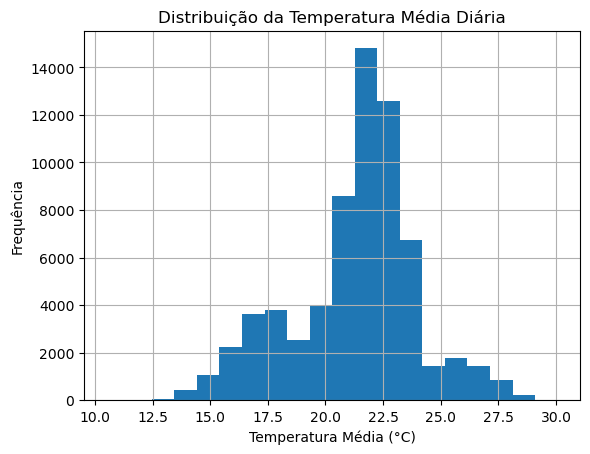

In [25]:
arboclima2['TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)'].hist(bins=20)
plt.title('Distribuição da Temperatura Média Diária')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência')
plt.show()

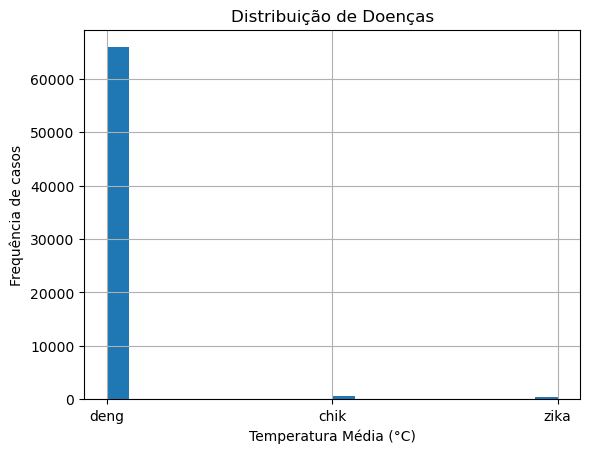

In [26]:
arboclima2['tipo'].hist(bins=20)
plt.title('Distribuição de Doenças')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência de casos')
plt.show()

In [27]:

valores_faltantes_inteiro = arboclima2.isnull().sum()
print(valores_faltantes_inteiro)

codigo_municipio_completo                                      0
COMUNINF                                                   44844
COPAISINF                                                  44669
COUFINF                                                    44827
CS_ESCOL_N                                                 13155
CS_GESTANT                                                    19
CS_RACA                                                     5182
CS_SEXO                                                        0
DOENCA_TRA                                                 51511
DT_ENCERRA                                                    95
DT_INVEST                                                  34220
DT_NOTIFIC                                                     0
DT_SIN_PRI                                                     0
EVOLUCAO                                                   34758
ID_AGRAVO                                                      0
ID_MN_RESI               

In [28]:

categoria_freq = arboclima2['CS_SEXO'].value_counts()
print("\nFrequência das Categorias - Sexo dos Pacientes:")
print(categoria_freq)


Frequência das Categorias - Sexo dos Pacientes:
CS_SEXO
F    38018
M    28937
I       47
Name: count, dtype: int64


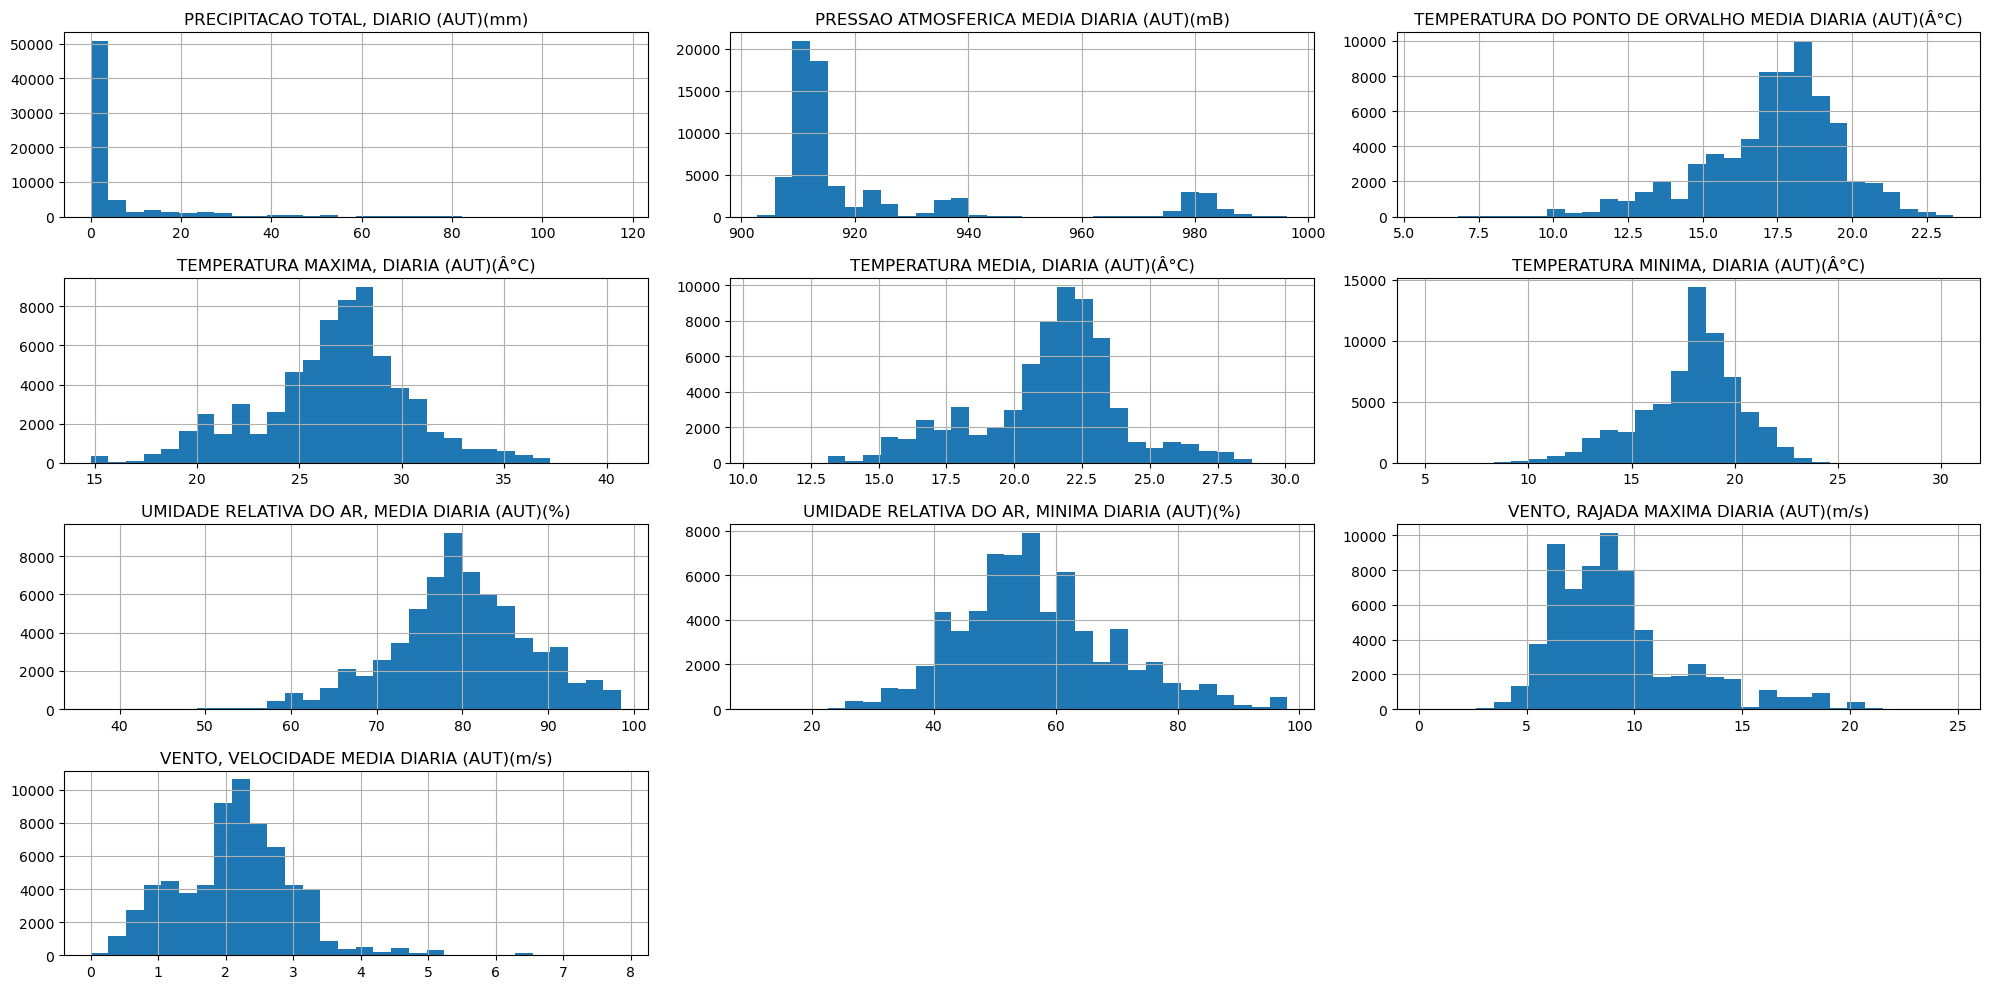

codigo_municipio_completo                                      0
COMUNINF                                                   44844
COPAISINF                                                  44669
COUFINF                                                    44827
CS_ESCOL_N                                                 13155
CS_GESTANT                                                    19
CS_RACA                                                     5182
CS_SEXO                                                        0
DOENCA_TRA                                                 51511
DT_ENCERRA                                                    95
DT_INVEST                                                  34220
DT_NOTIFIC                                                     0
DT_SIN_PRI                                                     0
EVOLUCAO                                                   34758
ID_AGRAVO                                                      0
ID_MN_RESI               

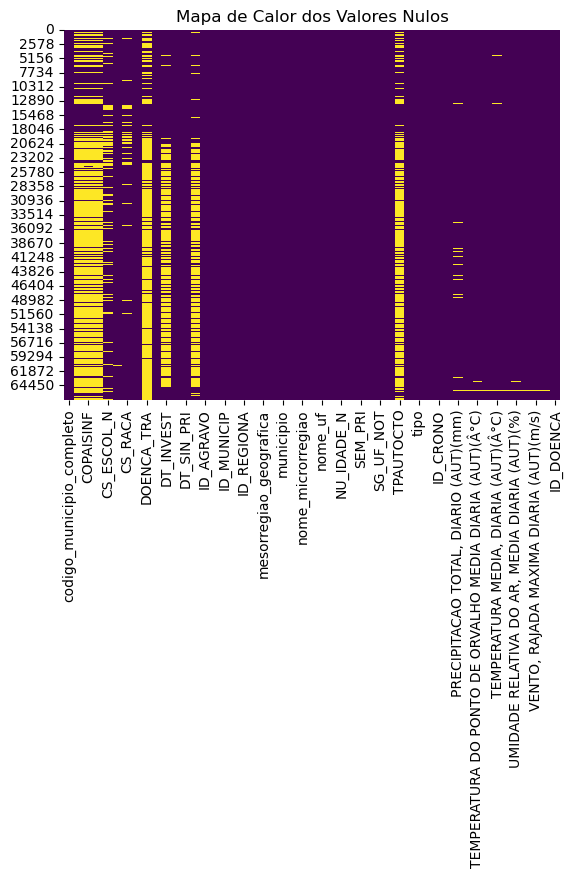

In [29]:

# Distribuição das variáveis climáticas
variaveis_clima = [
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)',
    'TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)',
    'TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)',
    'TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)'
]

arboclima2[variaveis_clima].hist(bins=30, figsize=(20, 10))
plt.tight_layout()
plt.show()


print(arboclima2.isnull().sum())
sns.heatmap(arboclima2.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor dos Valores Nulos')
plt.show()

C:\Users\johnn\AppData\Local\Temp\ipykernel_6884\910256056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo', data=arboclima2, palette='pastel')


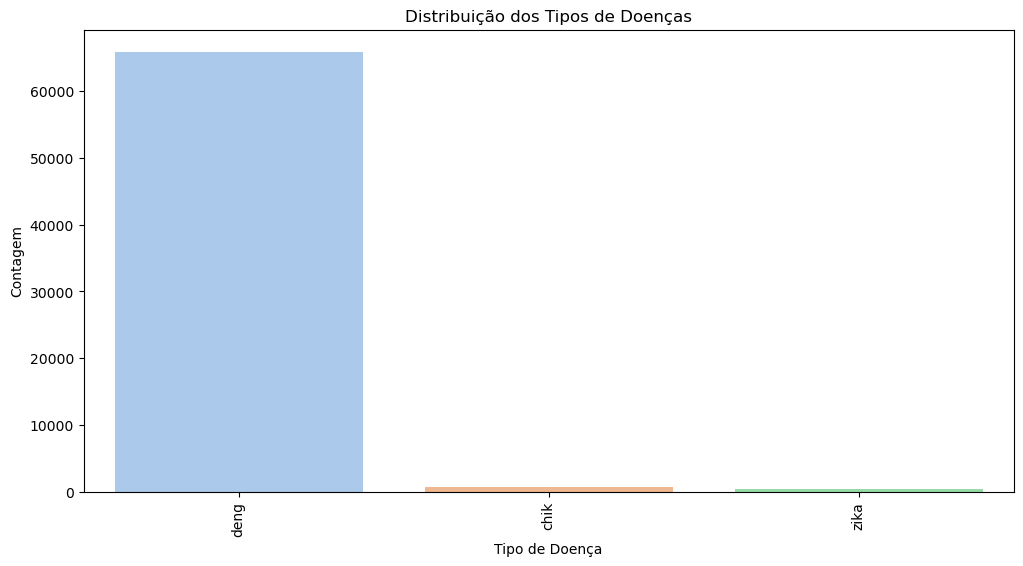

In [30]:
# Distribuição dos tipos de doenças
plt.figure(figsize=(12, 6))
sns.countplot(x='tipo', data=arboclima2, palette='pastel')
plt.xticks(rotation=90)
plt.title('Distribuição dos Tipos de Doenças')
plt.xlabel('Tipo de Doença')
plt.ylabel('Contagem')
plt.show()

# Análise Bivariada

In [31]:
# Criar a nova coluna ID_SEXO com mapeamento
arboclima2['ID_SEXO'] = arboclima2['CS_SEXO'].map({'F': 1, 'M': 2, 'I': 3})

# Verificar se a coluna foi criada corretamente
print(arboclima2[['CS_SEXO', 'ID_SEXO']].head())


  CS_SEXO  ID_SEXO
0       F        1
1       F        1
2       F        1
3       M        2
4       F        1


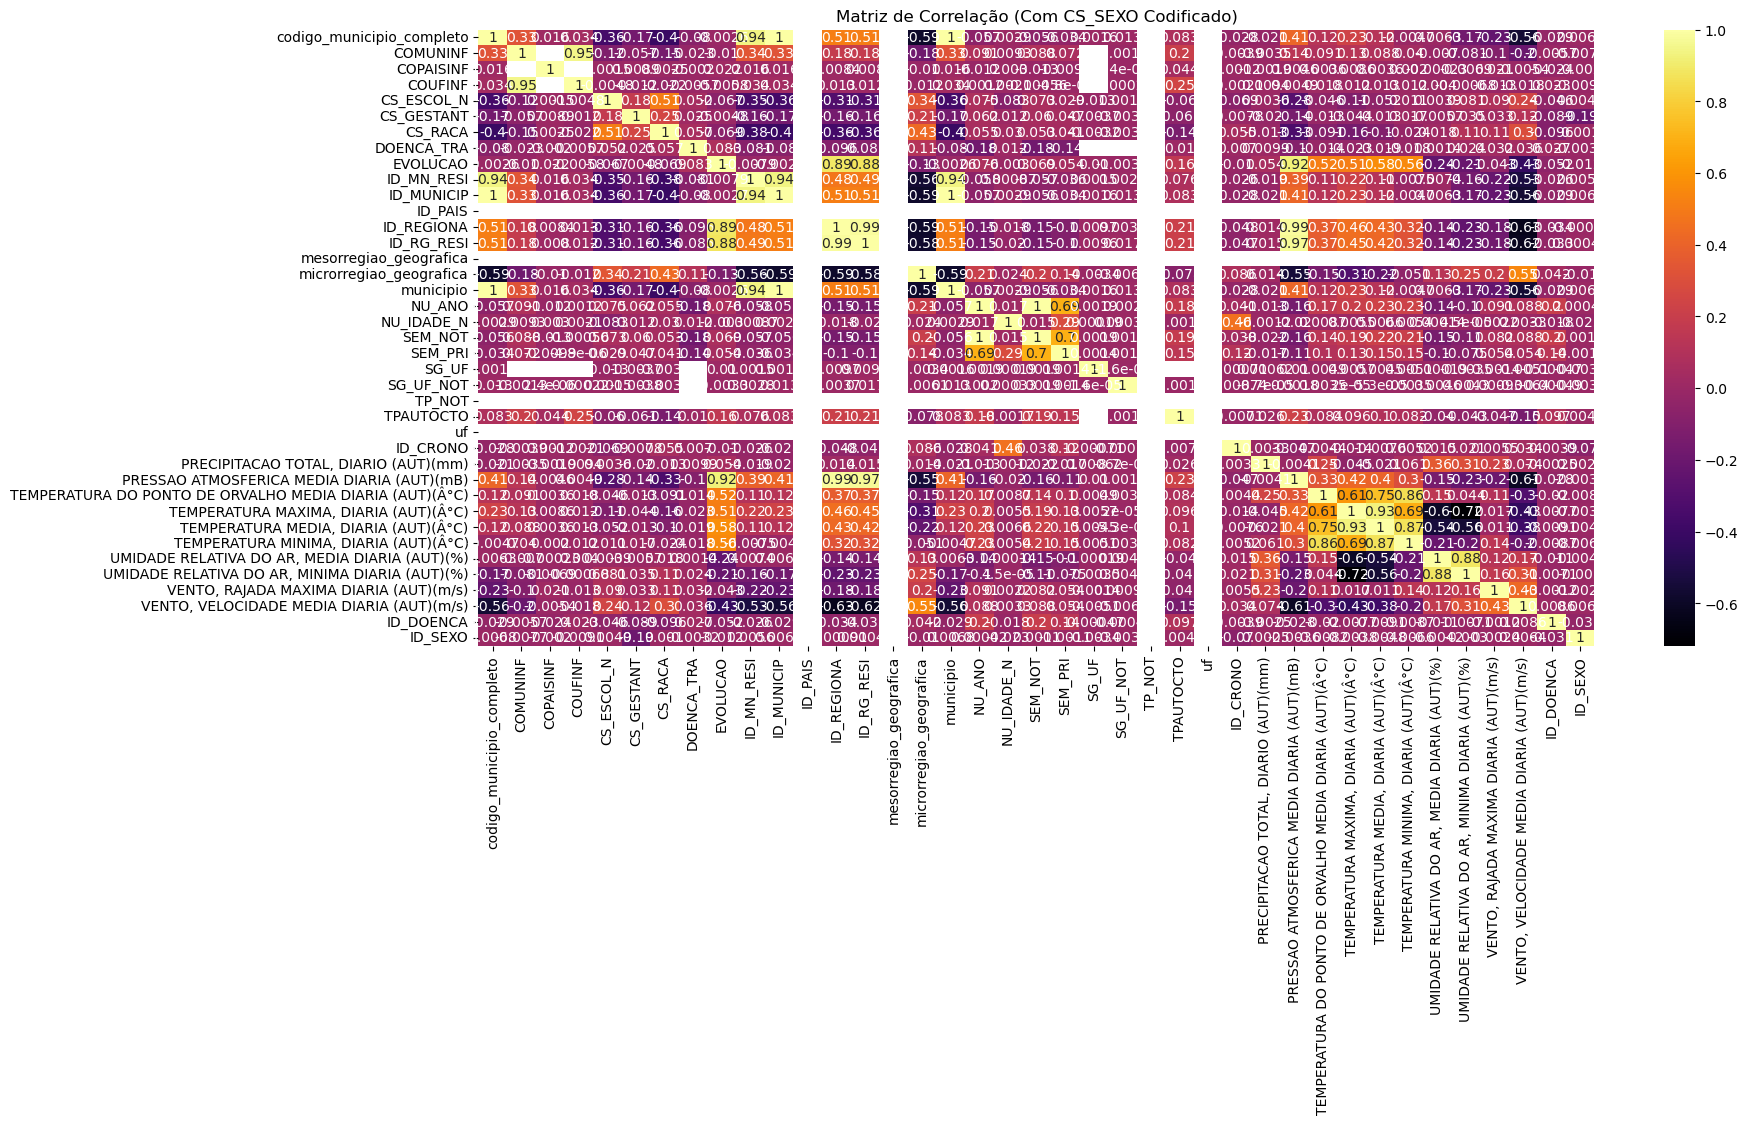

In [32]:
# Seleciona apenas as colunas numéricas
col_num = arboclima2.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação apenas para as colunas numéricas
matriz_correl = col_num.corr()

# Exibe o heatmap da matriz de correlação
plt.figure(figsize=(18, 8))
sns.heatmap(matriz_correl, annot=True, cmap='inferno')
plt.title('Matriz de Correlação (Com CS_SEXO Codificado)')
plt.show()

In [33]:
# garante que a coluna 'Data Medicao' está no formato datetime para ser usada
arboclima2['Data Medicao'] = pd.to_datetime(arboclima2['Data Medicao'], errors='coerce')

print(arboclima2['Data Medicao'].dtype)


datetime64[ns]


In [34]:
# Criar uma nova coluna 'data_medicao' que é uma cópia exata da coluna 'Data Medicao'
arboclima2['data_medicao'] = arboclima2['Data Medicao']

# Mostrar as primeiras linhas para verificar a criação da nova coluna
print(arboclima2[['Data Medicao', 'data_medicao']].head())


  Data Medicao data_medicao
0   2013-01-03   2013-01-03
1   2013-01-03   2013-01-03
2   2013-01-03   2013-01-03
3   2013-01-05   2013-01-05
4   2013-01-07   2013-01-07


In [35]:
# Extrair componentes de data
arboclima2['ano_medicao'] = arboclima2['Data Medicao'].dt.year
arboclima2['mes_medicao'] = arboclima2['Data Medicao'].dt.month

# Verificar as novas colunas
print(arboclima2[['Data Medicao', 'ano_medicao', 'mes_medicao']].head())

  Data Medicao  ano_medicao  mes_medicao
0   2013-01-03         2013            1
1   2013-01-03         2013            1
2   2013-01-03         2013            1
3   2013-01-05         2013            1
4   2013-01-07         2013            1


In [36]:
# Filtrar dados para casos de dengue
dengue_dados = arboclima2[arboclima2['tipo'] == 'deng']
print(dengue_dados.shape)


(65907, 55)


In [37]:
# Contar o número de casos por mês e ano usando as novas colunas
casos_mes = dengue_dados.groupby(['ano_medicao', 'mes_medicao']).size().reset_index(name='Número de Casos')
print(casos_mes.head())


   ano_medicao  mes_medicao  Número de Casos
0         2013            1              197
1         2013            2              973
2         2013            3             3654
3         2013            4             4801
4         2013            5             1823


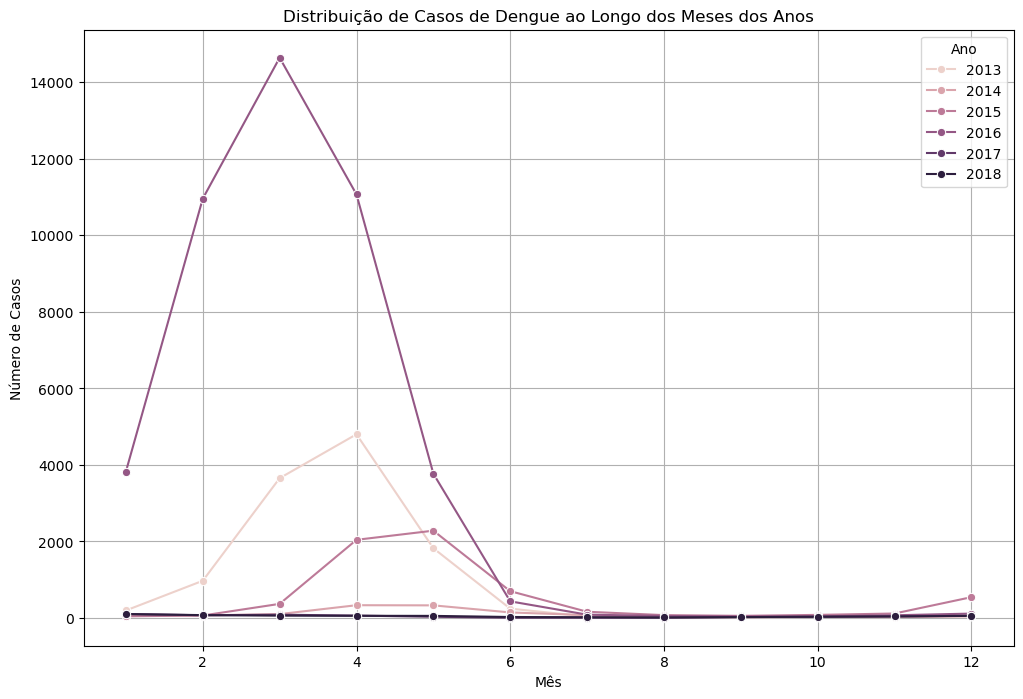

In [38]:

# Criar um gráfico de linha para visualizar a distribuição de casos
plt.figure(figsize=(12, 8))
sns.lineplot(data=casos_mes, x='mes_medicao', y='Número de Casos', hue='ano_medicao', marker='o')
plt.title('Distribuição de Casos de Dengue ao Longo dos Meses dos Anos')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.legend(title='Ano')
plt.grid(True)
plt.show()


In [39]:
# Calcular a média de temperatura para cada mês e ano
temp_media = dengue_dados.groupby(['ano_medicao', 'mes_medicao'])['TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)'].mean().reset_index(name='Média de Temperatura')

# Verificar os dados agregados
print(temp_media.head())


   ano_medicao  mes_medicao  Média de Temperatura
0         2013            1             21.184856
1         2013            2             23.363391
2         2013            3             22.505450
3         2013            4             19.056546
4         2013            5             18.186638


In [40]:
# Contar o número de casos por mês e ano usando as novas colunas
casos_mes = dengue_dados.groupby(['ano_medicao', 'mes_medicao']).size().reset_index(name='Número de Casos')

# Juntar a contagem de casos e a média de temperatura
casos_temp_media = pd.merge(casos_mes, temp_media, on=['ano_medicao', 'mes_medicao'])

# Verificar o DataFrame combinado
print(casos_temp_media.head())


   ano_medicao  mes_medicao  Número de Casos  Média de Temperatura
0         2013            1              197             21.184856
1         2013            2              973             23.363391
2         2013            3             3654             22.505450
3         2013            4             4801             19.056546
4         2013            5             1823             18.186638


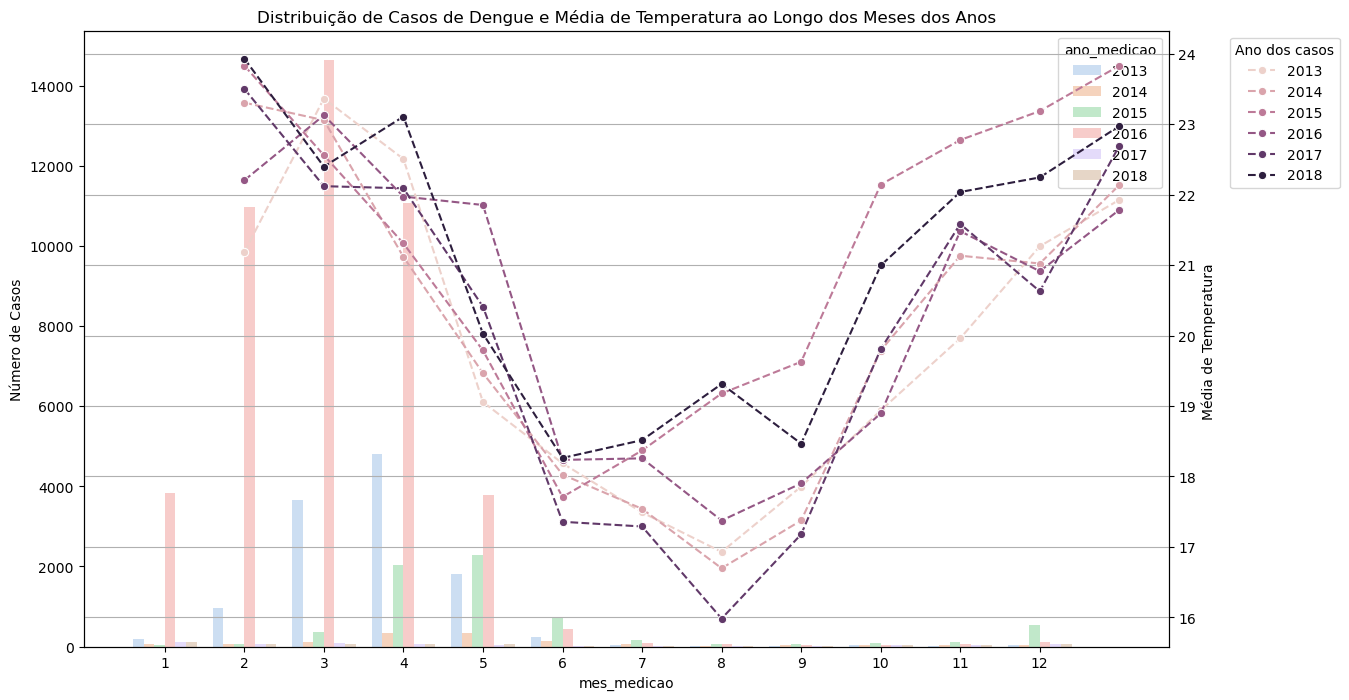

In [41]:

plt.figure(figsize=(14, 8))

# Gráfico de barras para o número de casos
sns.barplot(data=casos_temp_media, x='mes_medicao', y='Número de Casos', hue='ano_medicao', palette='pastel', alpha=0.6)

# Gráfico de linha para a média de temperatura
plt.twinx()  # Cria um segundo eixo y compartilhado
sns.lineplot(data=casos_temp_media, x='mes_medicao', y='Média de Temperatura', hue='ano_medicao', marker='o', color='black', linestyle='--')

plt.title('Distribuição de Casos de Dengue e Média de Temperatura ao Longo dos Meses dos Anos')
plt.xlabel('Meses do ano')
plt.ylabel('Número de Casos')
plt.ylabel('Média de Temperatura ')
plt.legend(title='Ano dos casos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [42]:

from sklearn.preprocessing import StandardScaler, LabelEncoder


# Converter as colunas de data para datetime
arboclima2['data_medicao'] = pd.to_datetime(arboclima2['data_medicao'])
arboclima2['DT_ENCERRA'] = pd.to_datetime(arboclima2['DT_ENCERRA'])
arboclima2['DT_INVEST'] = pd.to_datetime(arboclima2['DT_INVEST'])
arboclima2['DT_NOTIFIC'] = pd.to_datetime(arboclima2['DT_NOTIFIC'])
arboclima2['DT_SIN_PRI'] = pd.to_datetime(arboclima2['DT_SIN_PRI'])

# Criar médias móveis de 7 dias para as variáveis climáticas
arboclima2.set_index('data_medicao', inplace=True)


# Aplicar a média móvel
arboclima2[variaveis_clima] = arboclima2[variaveis_clima].rolling(window=7, min_periods=1).mean()

# Restaurar o índice original
arboclima2.reset_index(inplace=True)

# Definindo a variável target
arboclima2['target'] = arboclima2.groupby(['municipio', 'ano_medicao', 'mes_medicao'])['ID_DOENCA'].transform('count')

# Separar variáveis independentes e dependentes
features = variaveis_clima + ['CS_RACA', 'CS_SEXO', 'ID_SEXO', 'ID_CRONO']
X = arboclima2[features]
y = arboclima2['target']

# Codificando variáveis categóricas
categorical_vars = ['CS_RACA', 'CS_SEXO', 'ID_SEXO', 'ID_CRONO']
label_encoders = {}

for col in categorical_vars:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Normalizando as variáveis climáticas
scaler = StandardScaler()
X[variaveis_clima] = scaler.fit_transform(X[variaveis_clima])

# Mostrar as primeiras linhas dos dados preparados
print(X.head())
print(y.head())

   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)  PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)  TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)  TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)  TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)  TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)  UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)  VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)  VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)  CS_RACA  CS_SEXO  ID_SEXO  ID_CRONO
0                             -0.457207                                    0.021047                                           0.009049                                     1.061771                              0.747583                               0.132512                                      -1.045107                                       -1.130916                                0.595310                                  -0.421752        2        0        0         4
1                             -0.457207                 

C:\Users\johnn\AppData\Local\Temp\ipykernel_6884\446868709.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\johnn\AppData\Local\Temp\ipykernel_6884\446868709.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\johnn\AppData\Local\Temp\ipykernel_6884\446868709.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

C:\Users\johnn\AppData\Local\Temp\ipykernel_6884\880946765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['target'] = y


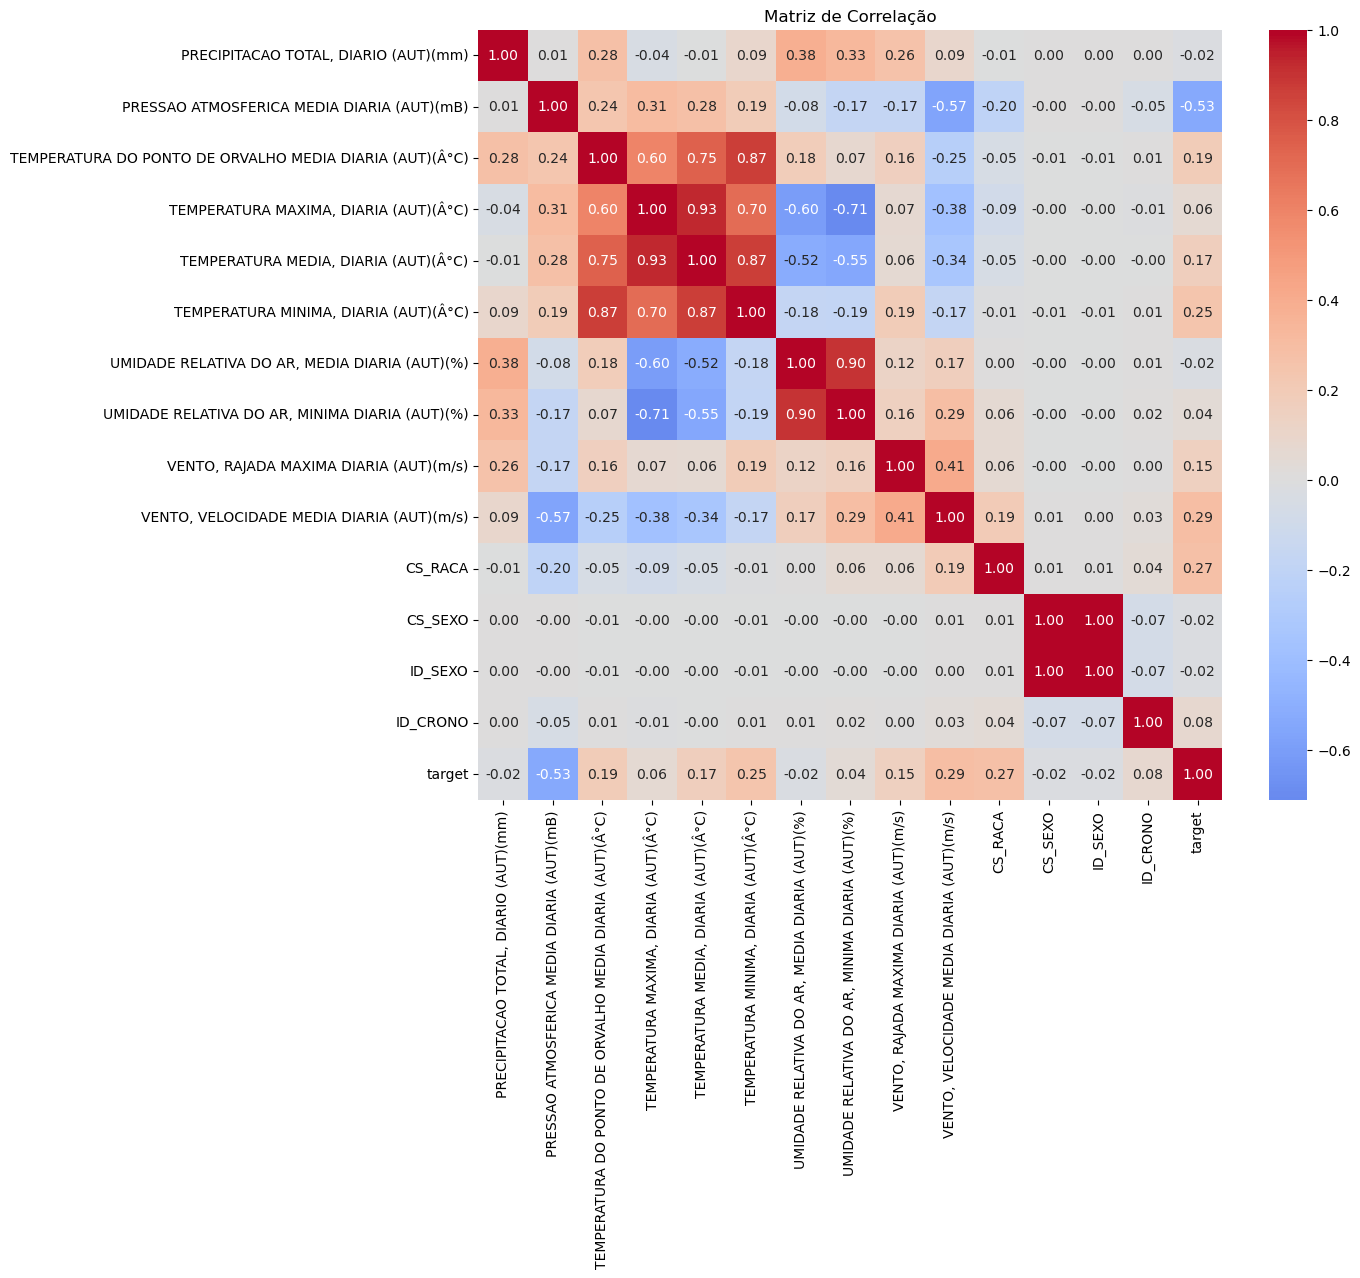

In [43]:

# Adicionar a coluna 'target' ao DataFrame de features para análise
X['target'] = y

# Calcular a matriz de correlação
corr_matrix = X.corr()

# Criar um mapa de calor para a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()


In [47]:
# Criar uma cópia do DataFrame original
x_c = X.copy()

# Verificar se a cópia foi criada corretamente
print(x_c.head())

   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)  PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)  TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)  TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)  TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)  TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)  UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)  UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)  VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)  VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)  CS_RACA  CS_SEXO  ID_SEXO  ID_CRONO  target
0                             -0.457207                                    0.021047                                           0.009049                                     1.061771                              0.747583                               0.132512                                      -1.045107                                       -1.130916                                0.595310                                  -0.421752        2        0        0         4      76
1                             -0.457207 

In [49]:
# Verificar a quantidade de valores nulos em cada coluna da cópia
nulos_x_c = x_c.isnull().sum()

# Calcular a porcentagem de valores nulos em cada coluna
percentual_nulos_x_c = (nulos_x_c / len(x_c)) * 100

# Criar um DataFrame com a quantidade e a porcentagem de valores nulos
nulos_X = pd.DataFrame({
    'Numero Nulos': nulos_x_c,
    'Porcentagem Nulos (%)': percentual_nulos_x_c
})

# Mostrar a quantidade e a porcentagem de valores nulos
print(nulos_X[nulos_X['Numero Nulos'] > 0])


                                                    Numero Nulos  Porcentagem Nulos (%)
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                         179               0.267156
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                    92               0.137309
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (A...           216               0.322378
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                         61               0.091042
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                         276               0.411928
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                         60               0.089550
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)                184               0.274619
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)                61               0.091042
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                        61               0.091042
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                     92               0.137309


In [50]:
# Remover linhas com valores nulos da cópia
x_c_limpo = x_c.dropna()

# Garantir que as variáveis dependentes (y) correspondam ao DataFrame limpo
y_clean = y[x_c_limpo.index]


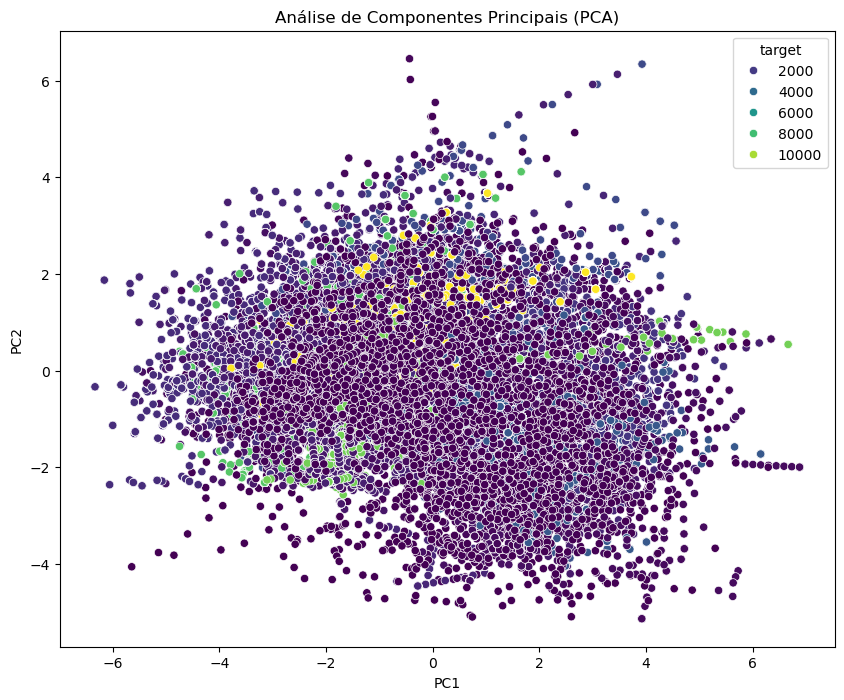

In [51]:
from sklearn.decomposition import PCA


# Realizar PCA na cópia limpa
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
X_pca = pca.fit_transform(x_c_limpo[variaveis_clima])

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_clean.values

# Visualizar os componentes principais
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis')
plt.title('Análise de Componentes Principais (PCA)')
plt.show()
